Date   ADAWE BIKE    ADAWE PED         ALEX  \
count                           3377  1186.000000  1186.000000  3136.000000   
mean   2014-07-28 15:01:51.933669120   925.467116  1214.365093   950.942602   
min              2010-01-01 00:00:00    23.000000    25.000000     0.000000   
25%              2012-04-26 00:00:00   157.000000   819.000000    15.000000   
50%              2014-08-18 00:00:00   590.000000  1130.500000   729.000000   
75%              2016-12-07 00:00:00  1648.250000  1585.000000  1767.250000   
max              2019-01-02 00:00:00  3056.000000  7617.000000  4149.000000   
std                              NaN   836.635842   587.467214   917.413465   

              COBY         CRTZ        LBAY         LLYN         LMET  \
count  3259.000000  2526.000000  915.000000  1919.000000  2831.000000   
mean    866.906413   889.032067  312.550820   789.997916  1104.709290   
min       0.000000     0.000000    0.000000     0.000000     0.000000   
25%      93.000000    61.000000   94.500000   167.500000   254.000000   
50%     641.000000   560.000000  280.000000   606.000000   799.000000   
75%    1557.500000  1624.750000  506.000000  1348.000000  1874.500000   
max    4980.000000  5290.000000  907.000000  3073.000000  4128.000000   
std     813.826691   903.940074  235.742085   690.778758   981.172785   

              OBVW         OGLD         ORPY         OYNG      PORTAGE  \
count  2098.000000  2099.000000  3258.000000  1188.000000   612.000000   
mean    405.442326   483.068604  1223.150092   406.617845  1361.506536   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000    64.000000     2.000000    44.000000   658.250000   
50%     264.000000   328.000000   866.000000   322.000000  1281.000000   
75%     724.000000   847.000000  2296.500000   688.500000  2090.500000   
max    3547.000000  3193.000000  5797.000000  1439.000000  3123.000000   
std     442.852677   467.237427  1251.516319   375.925534   819.570071   

              SOMO  
count  2573.000000  
mean    385.283327  
min       0.000000  
25%      84.000000  
50%     310.000000  
75%     634.000000  
max    1262.000000  
std     326.227724

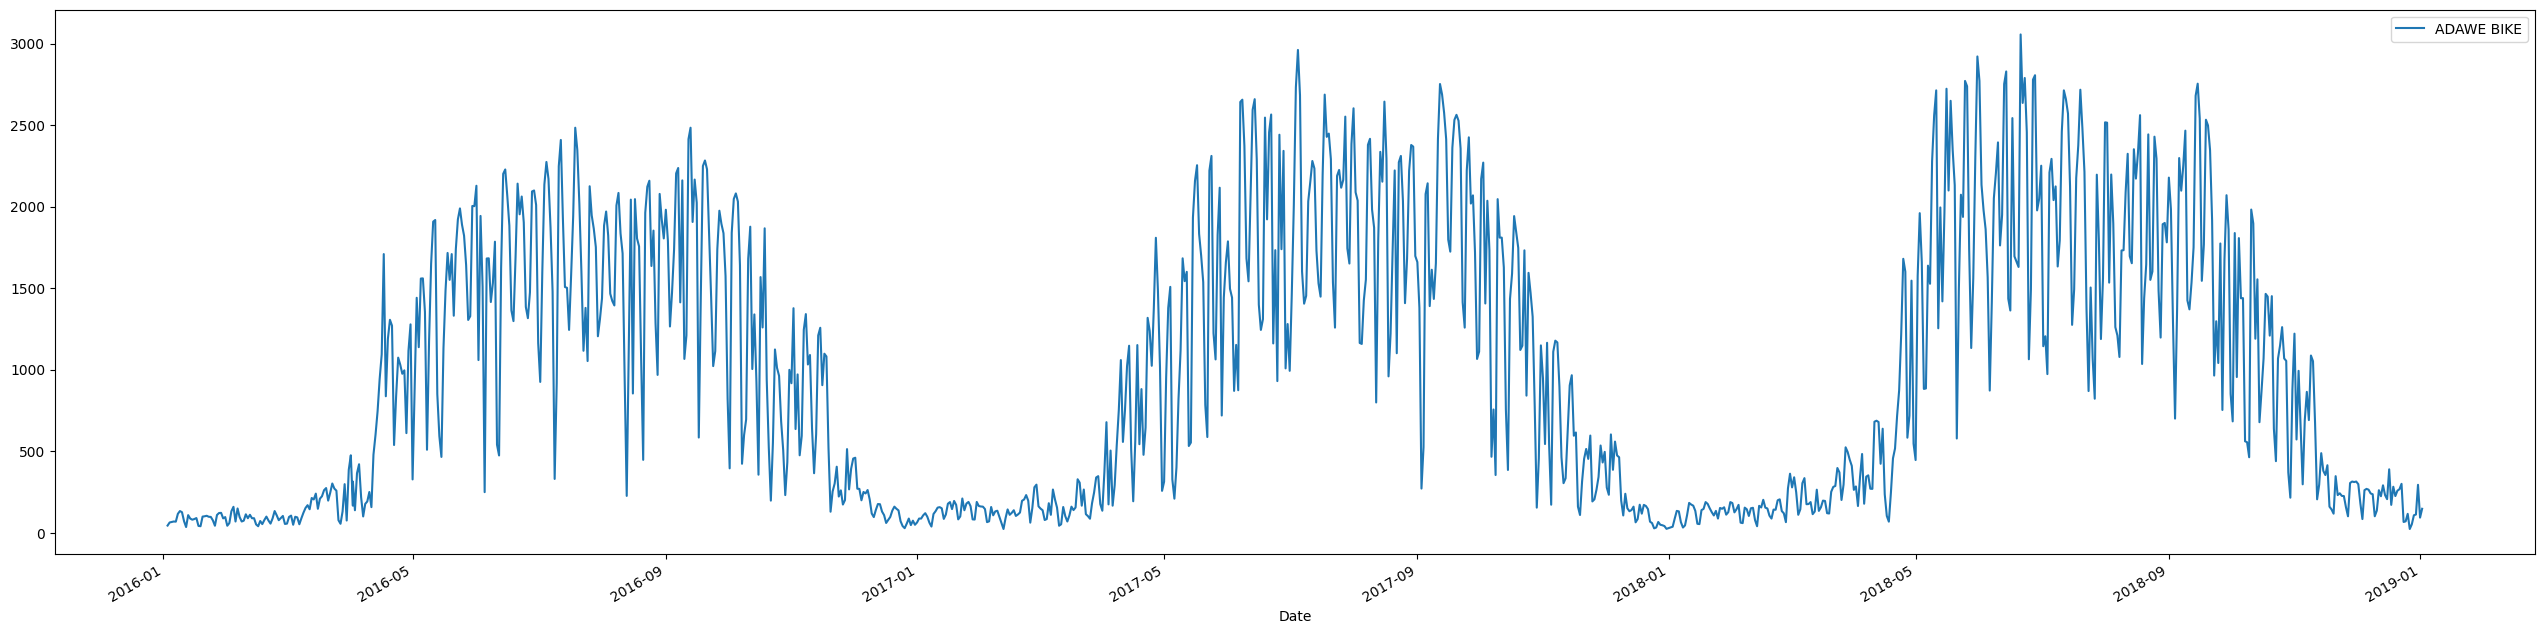

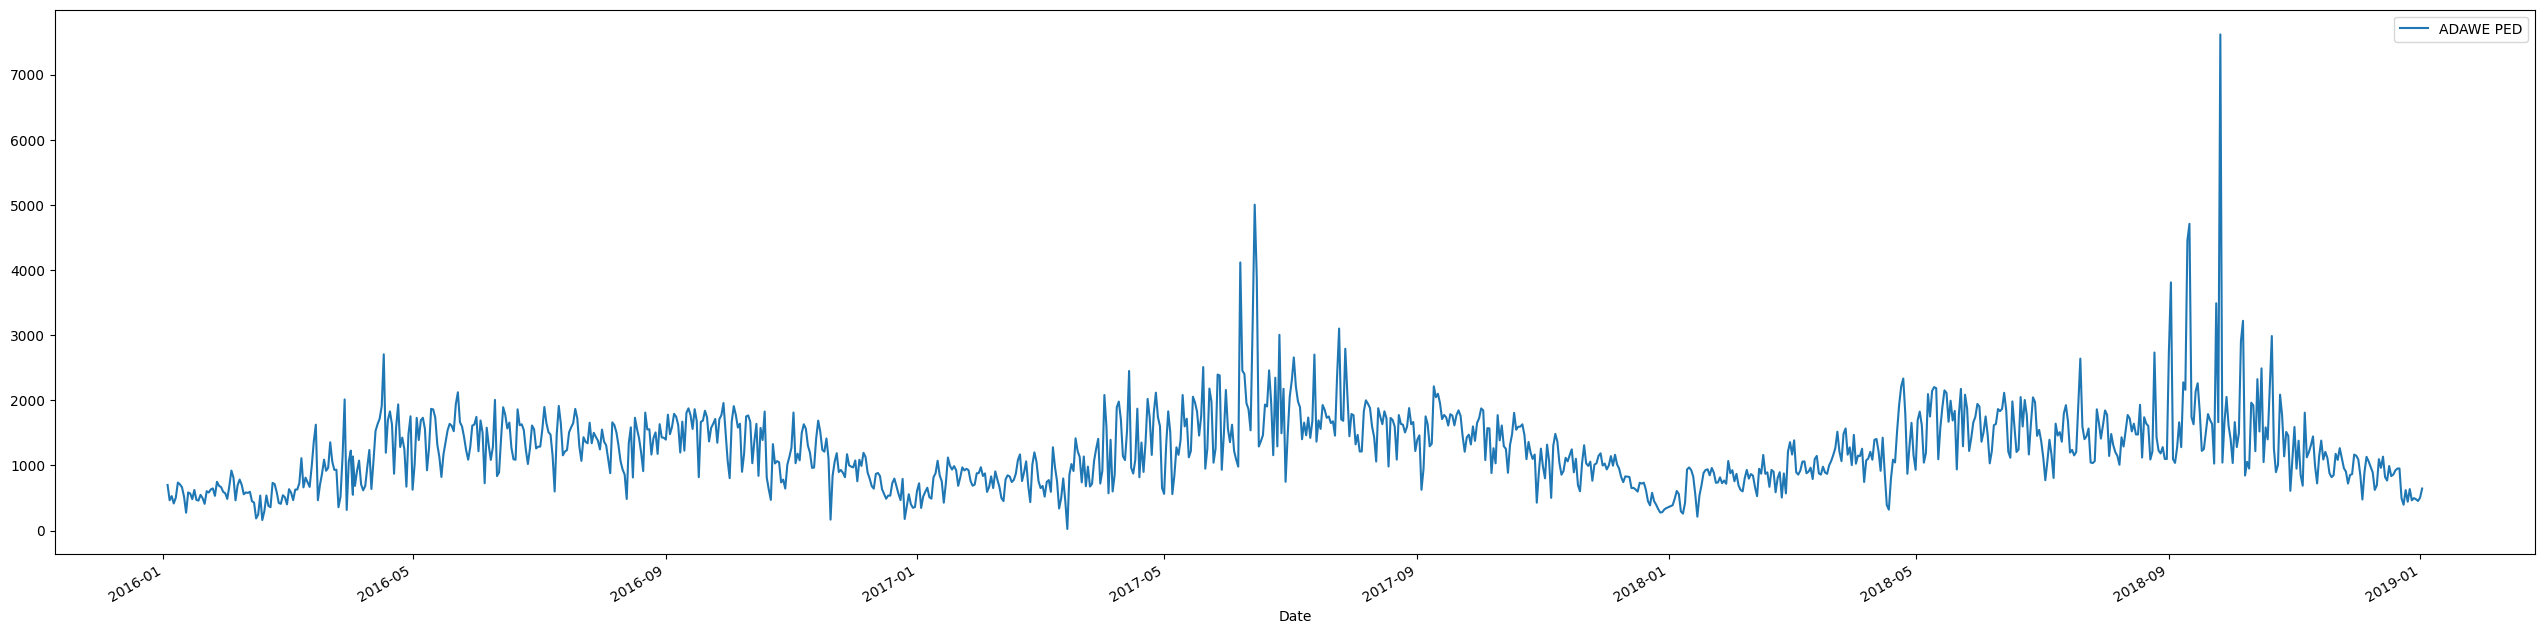

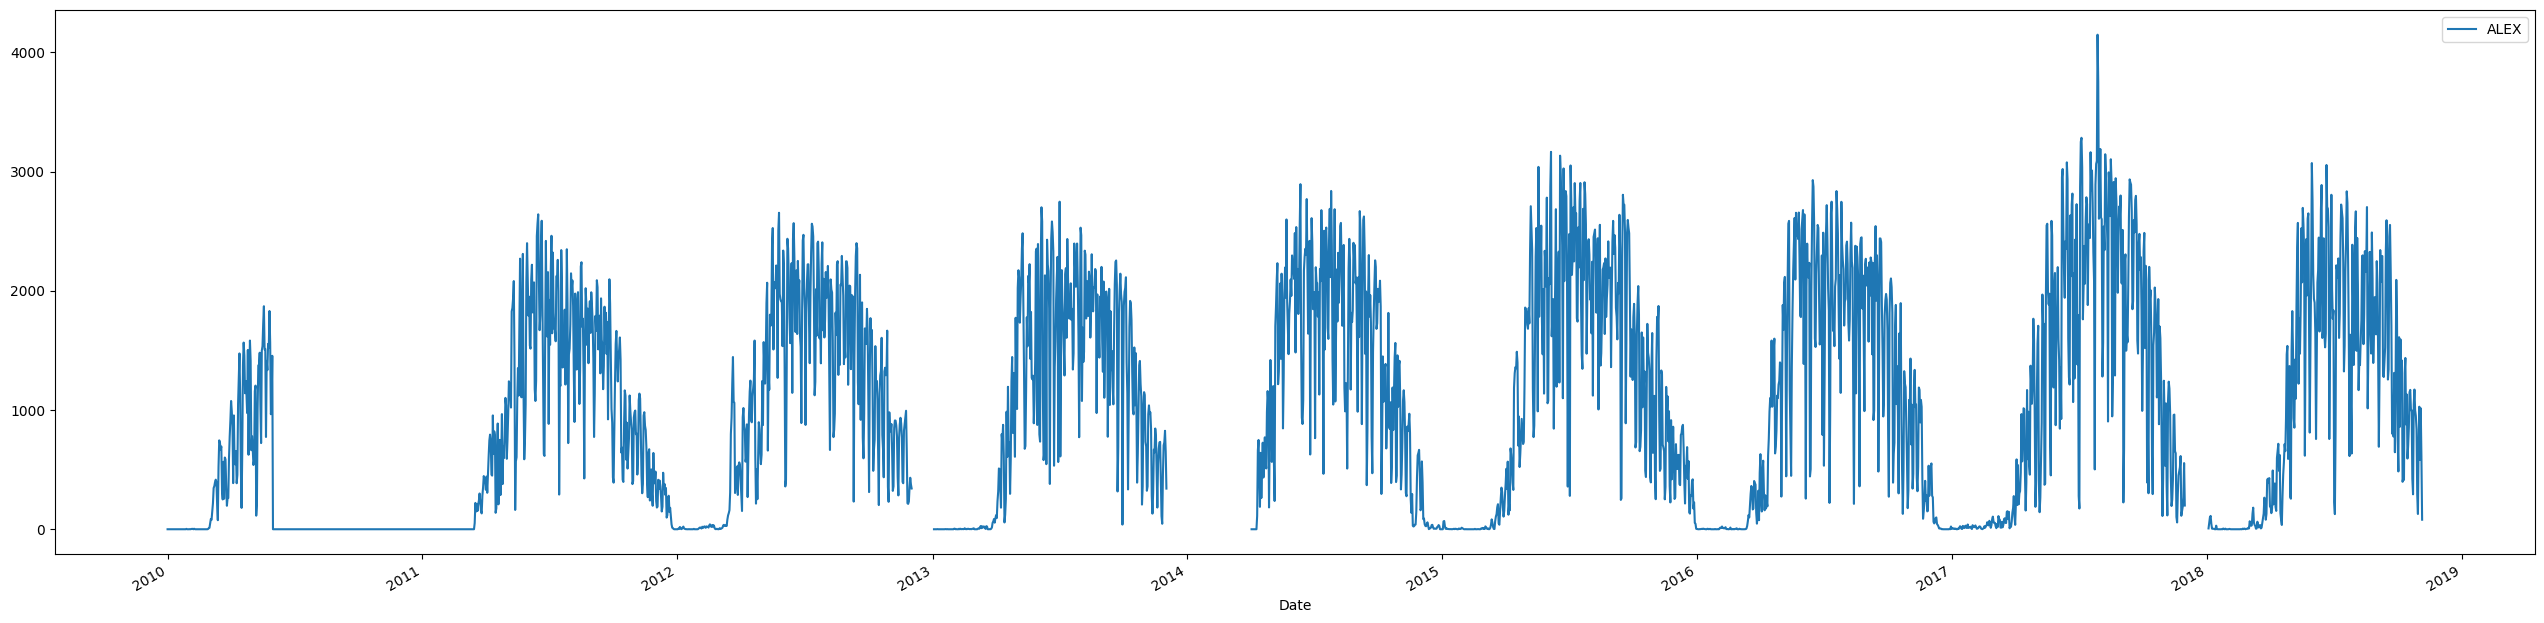

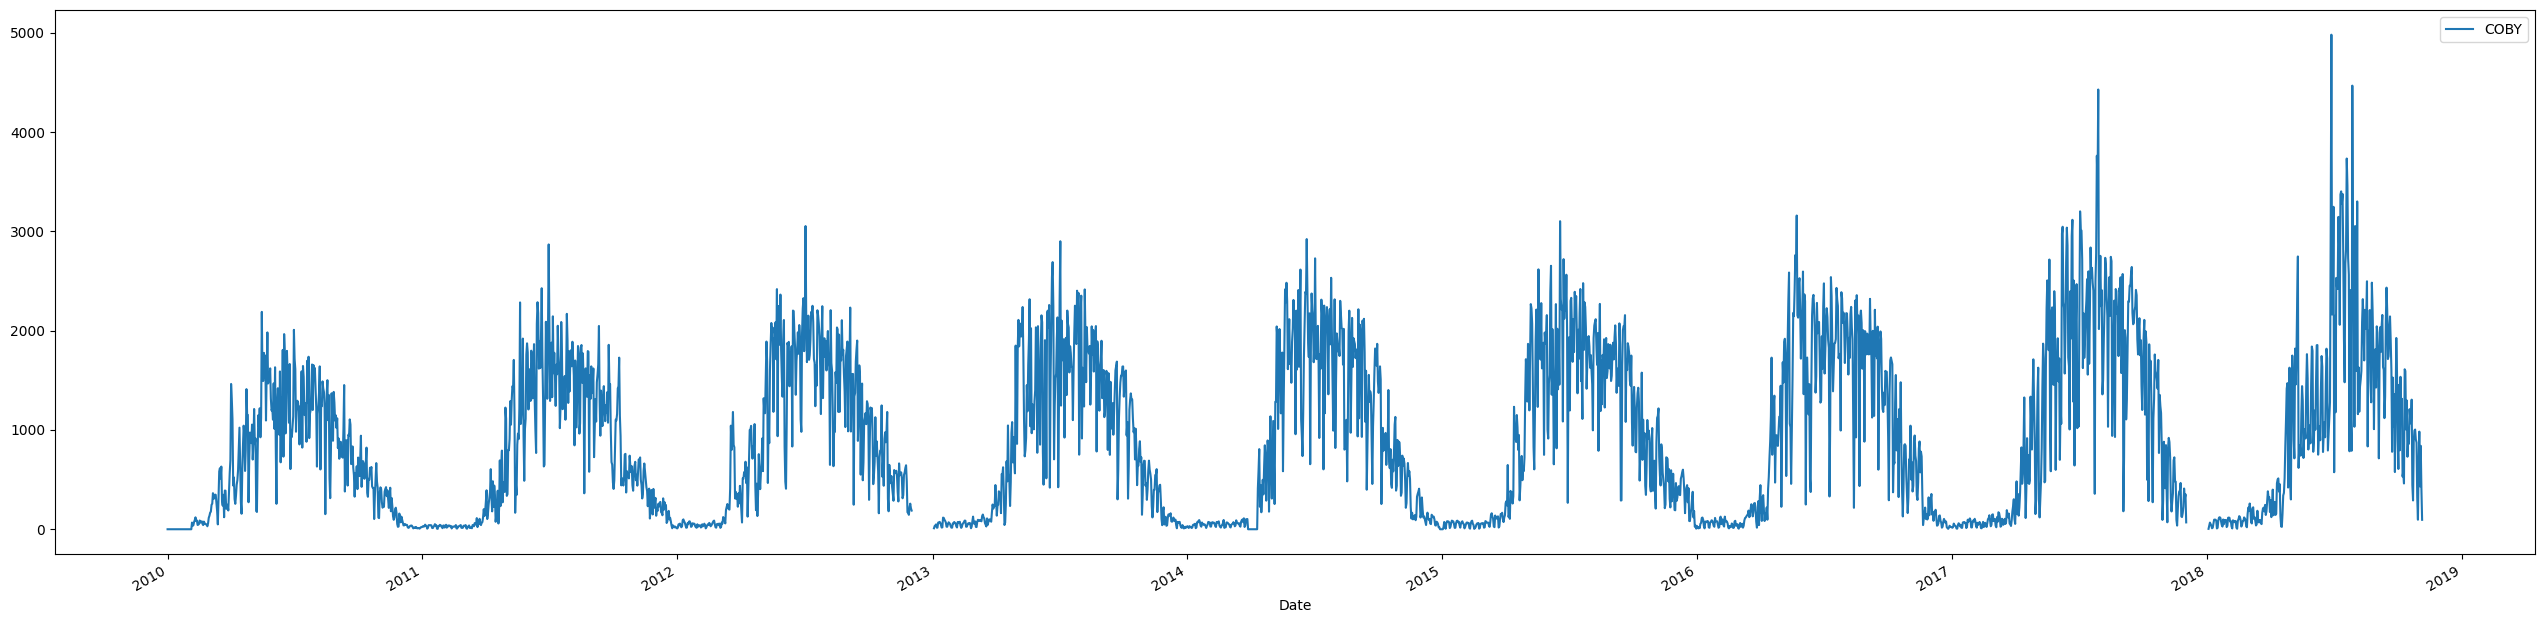

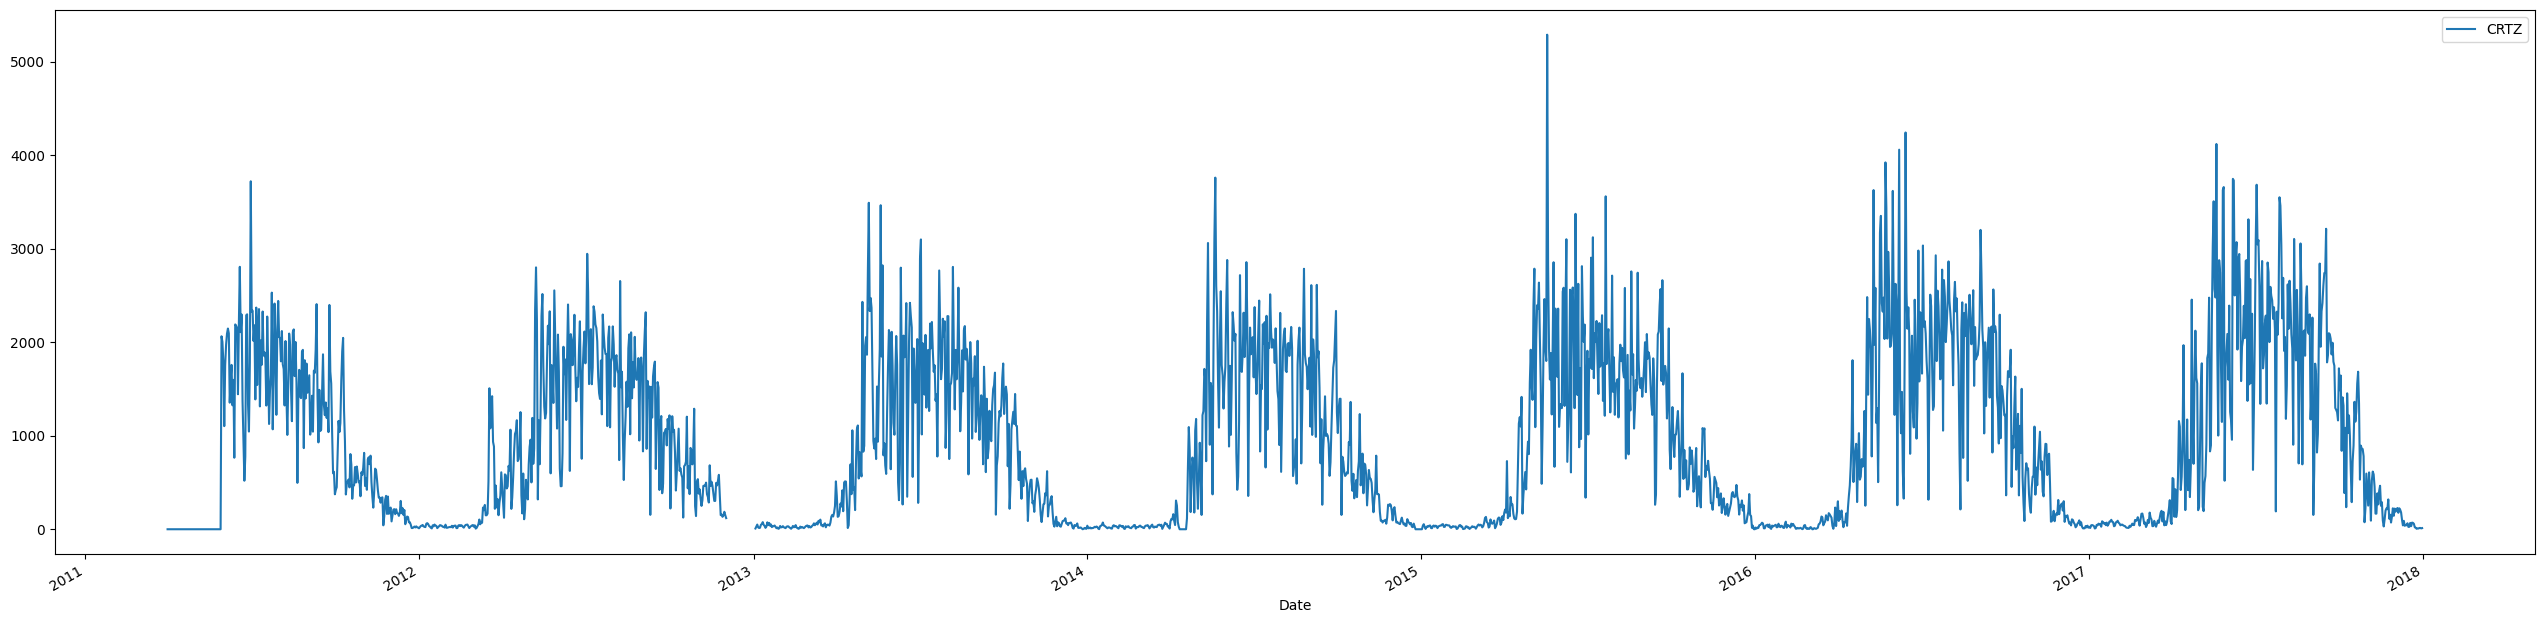

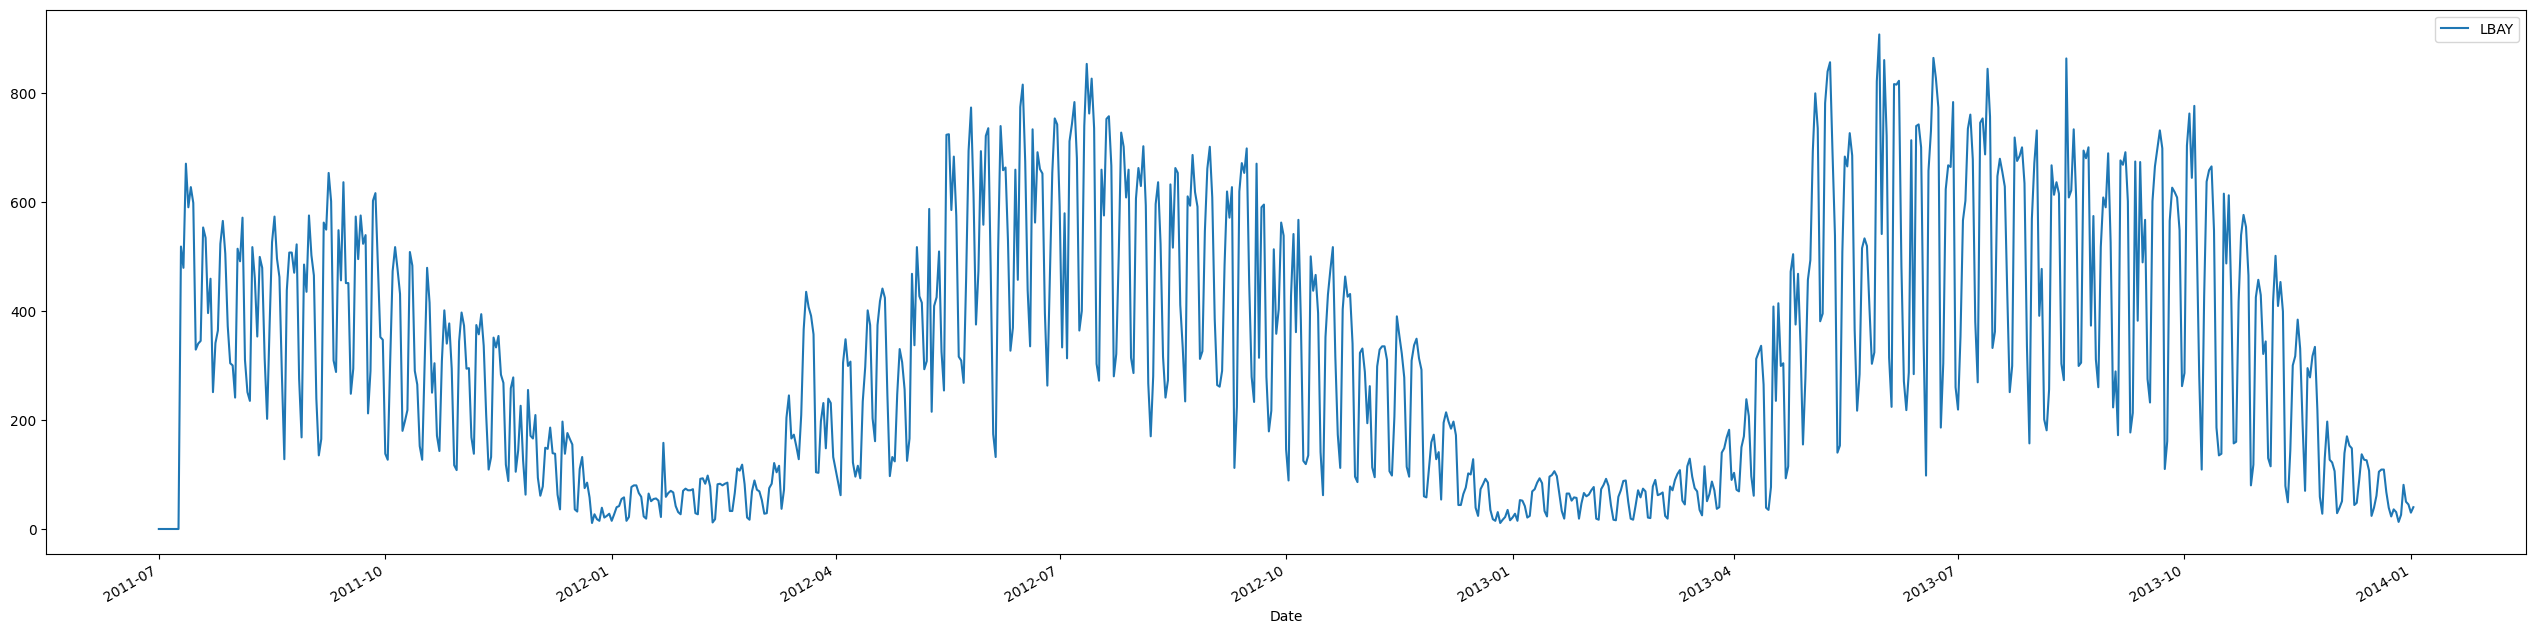

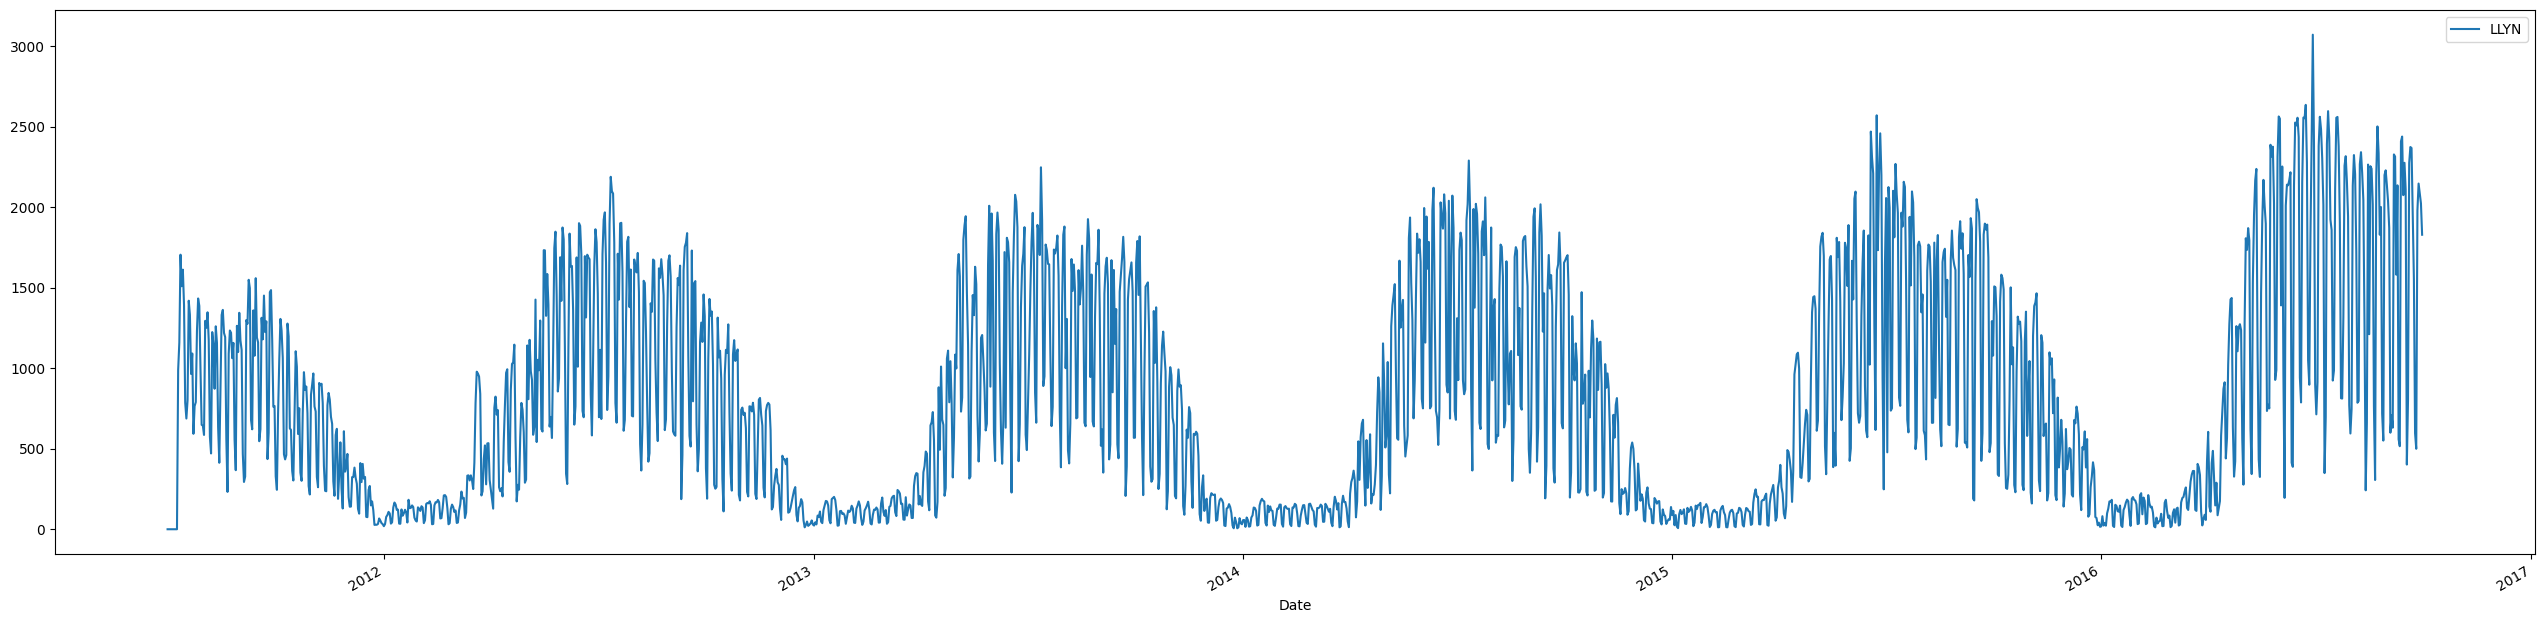

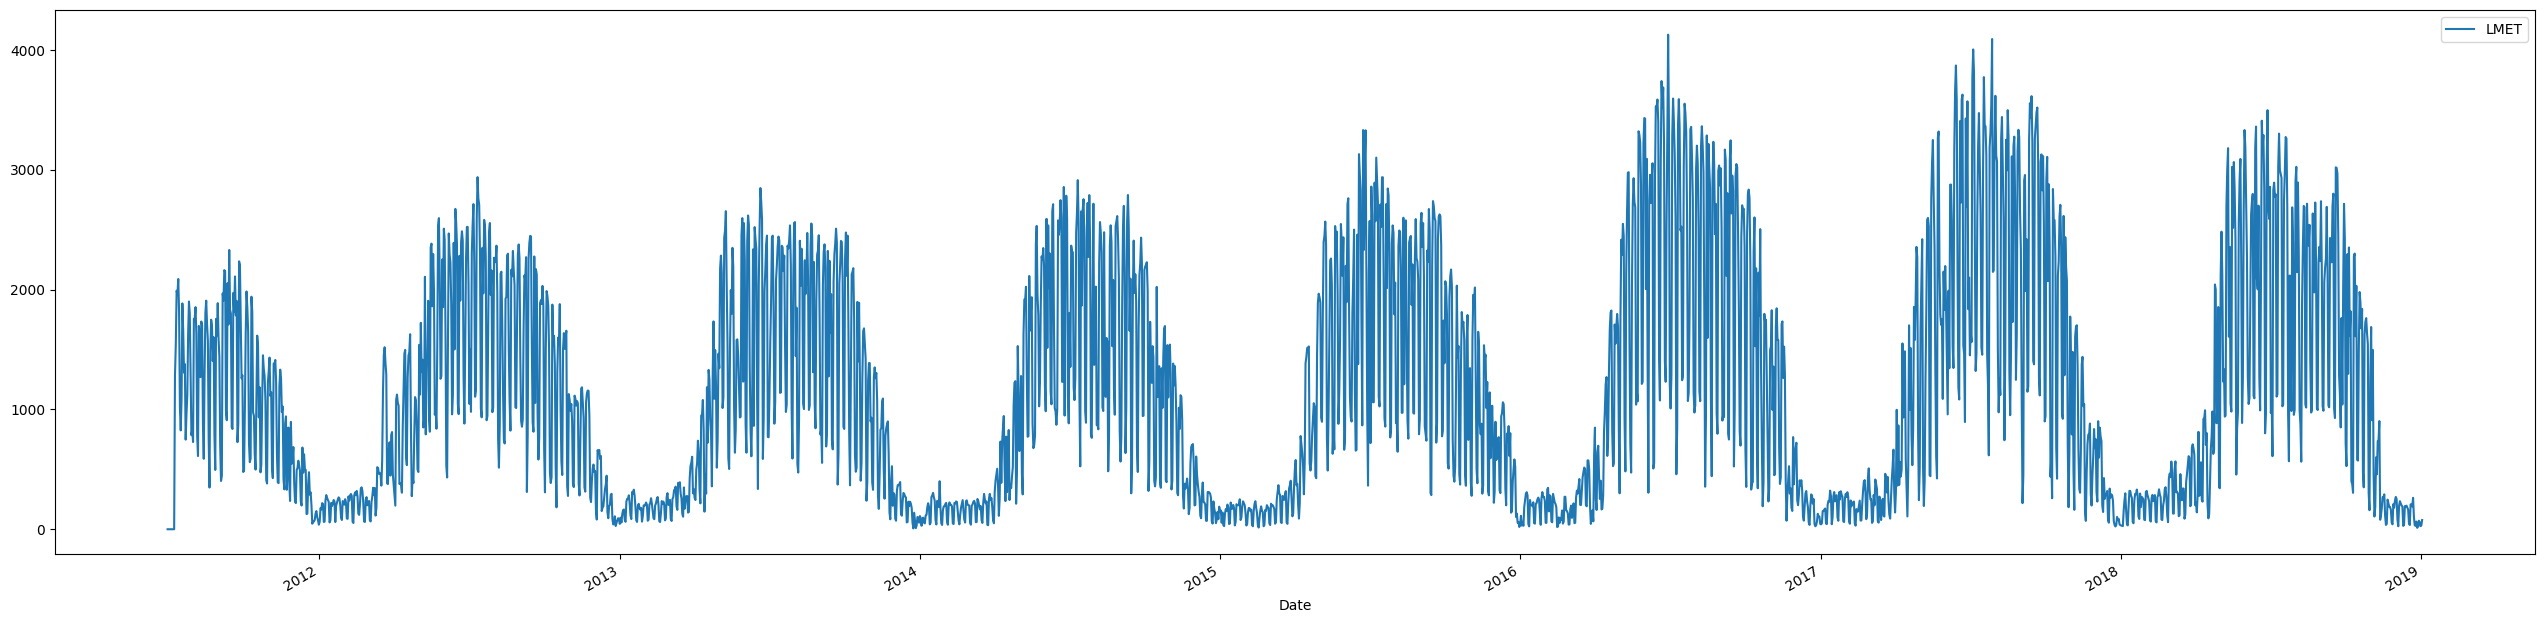

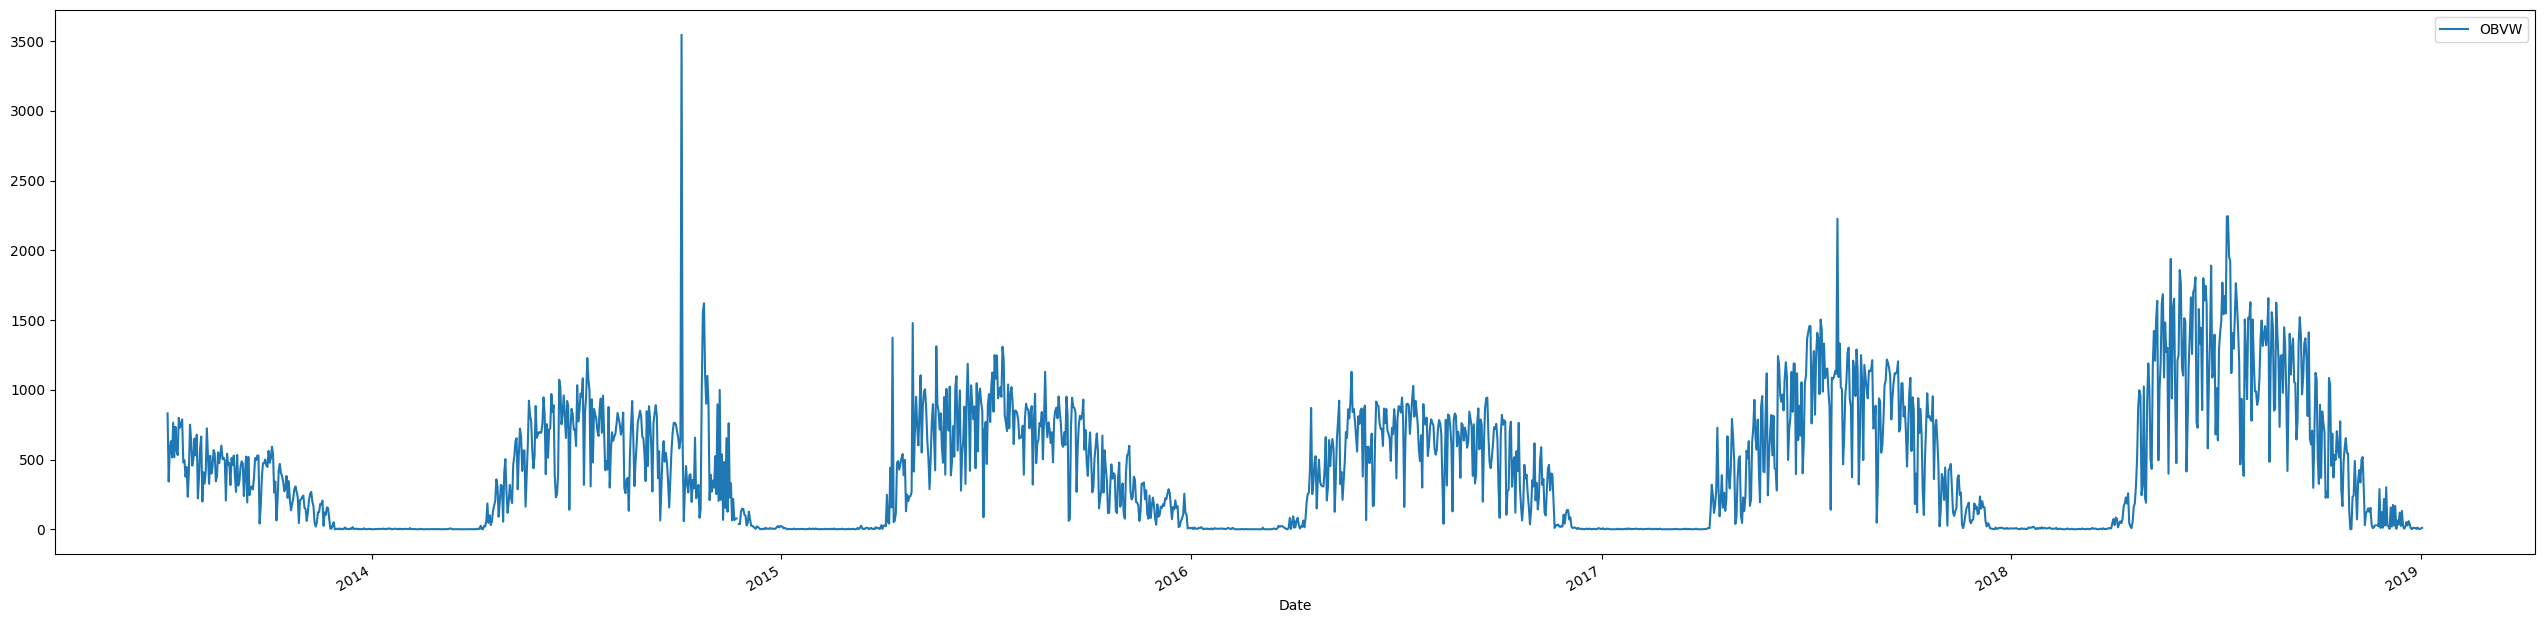

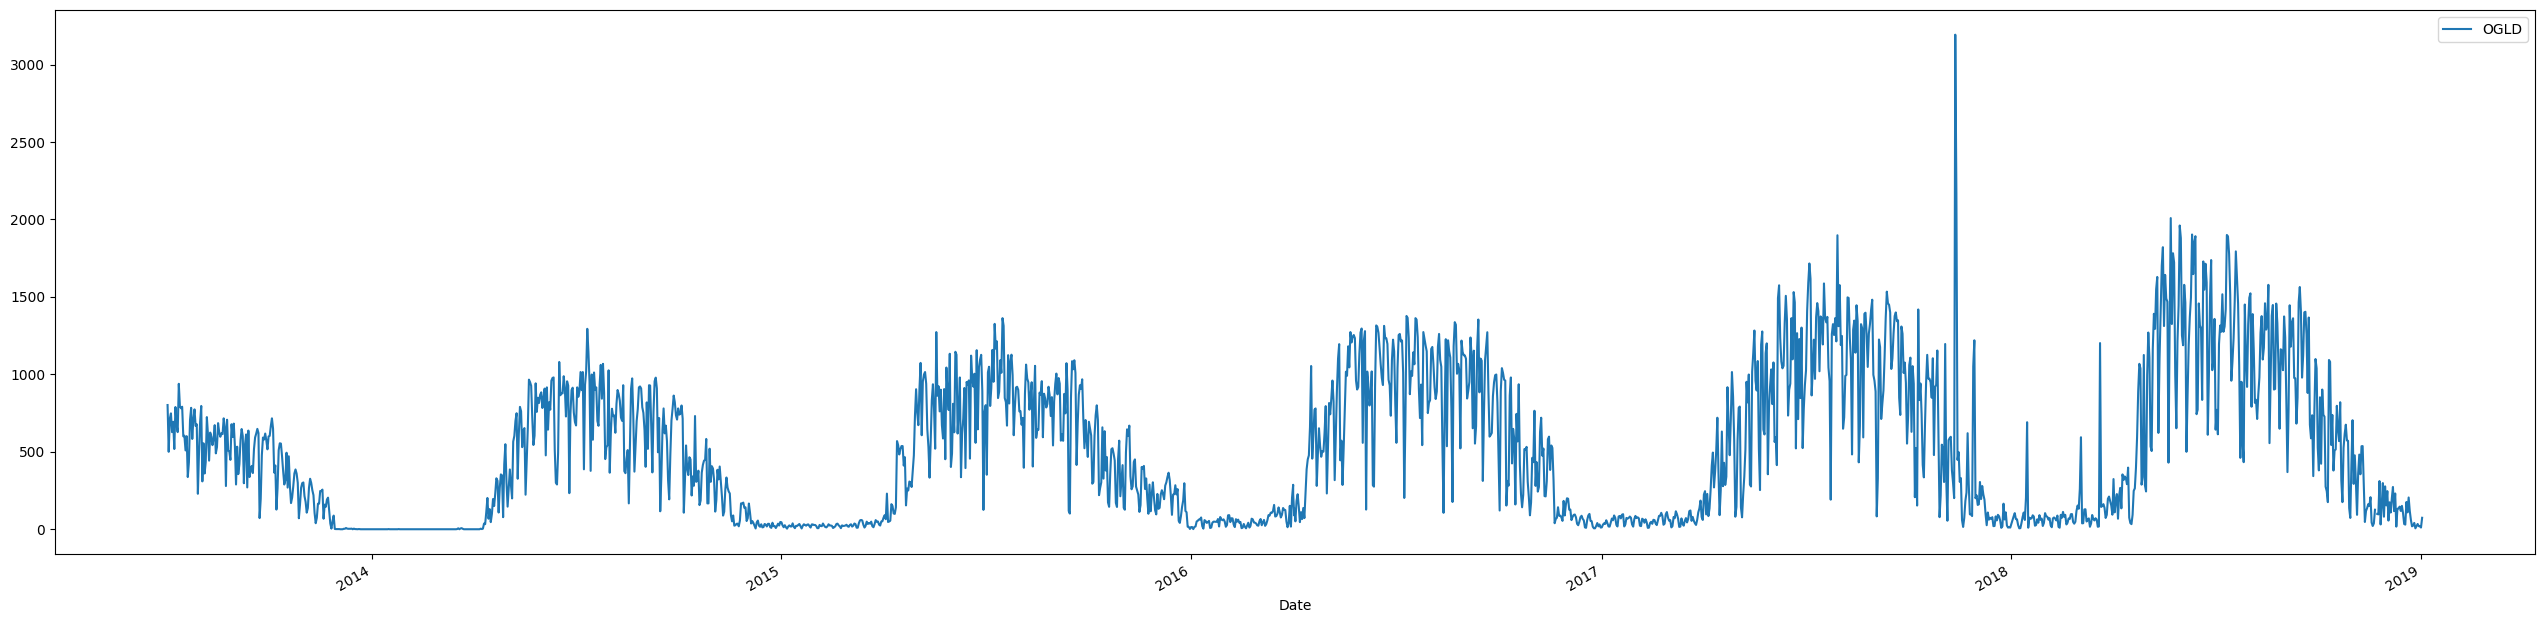

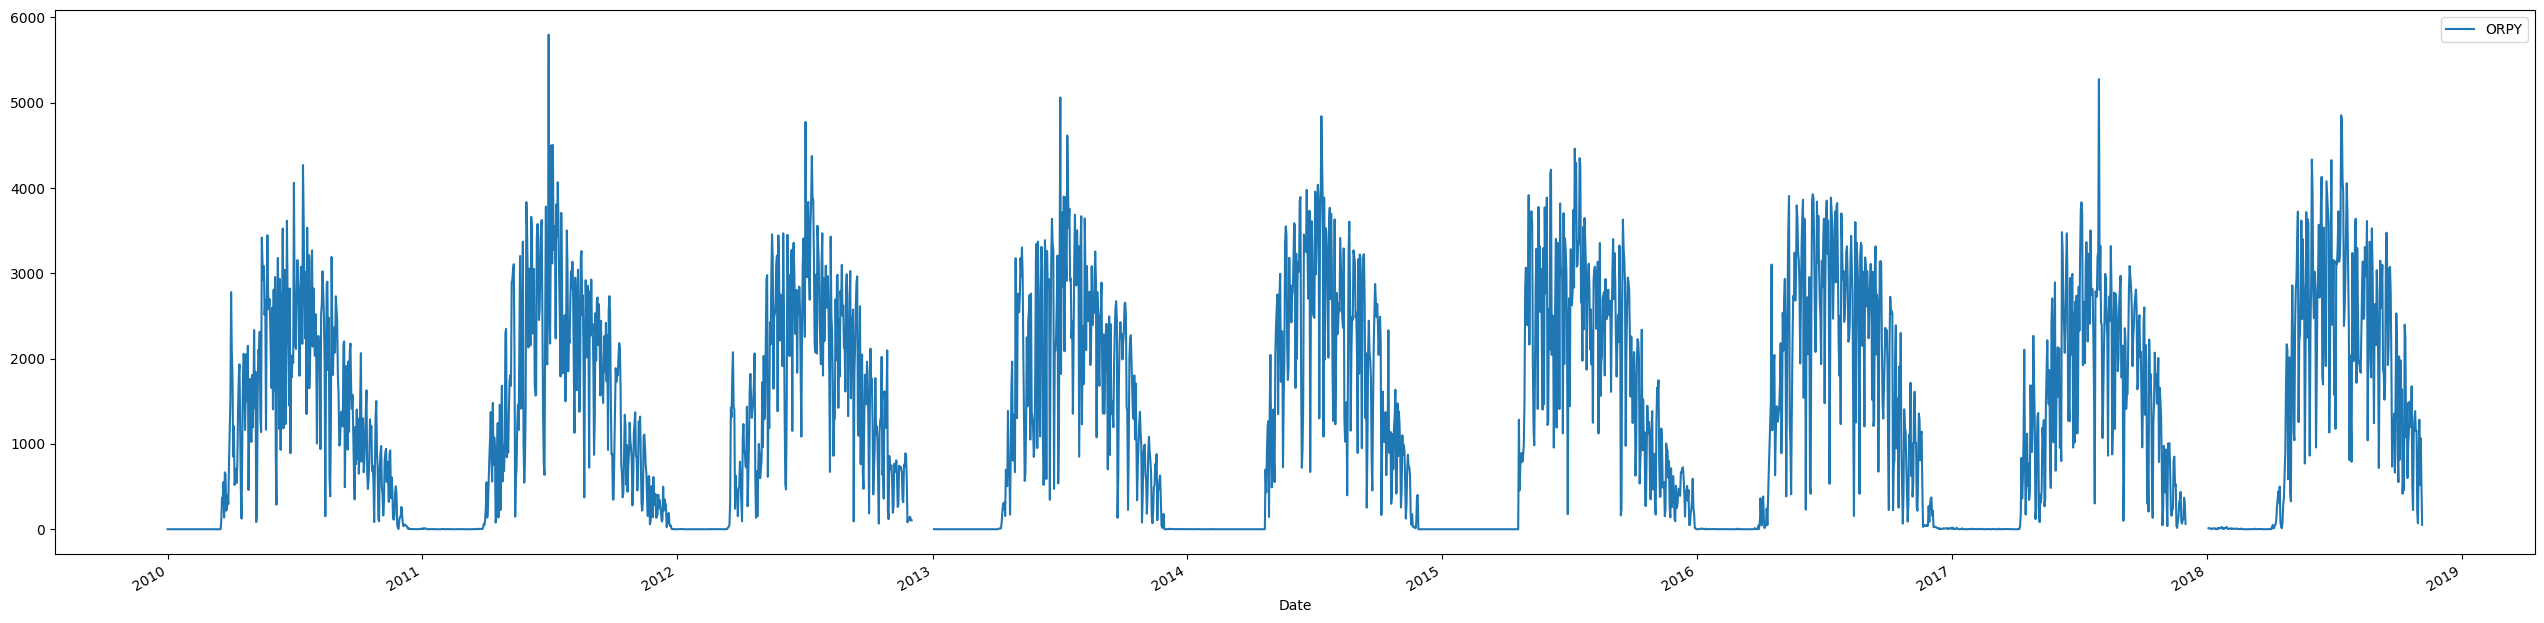

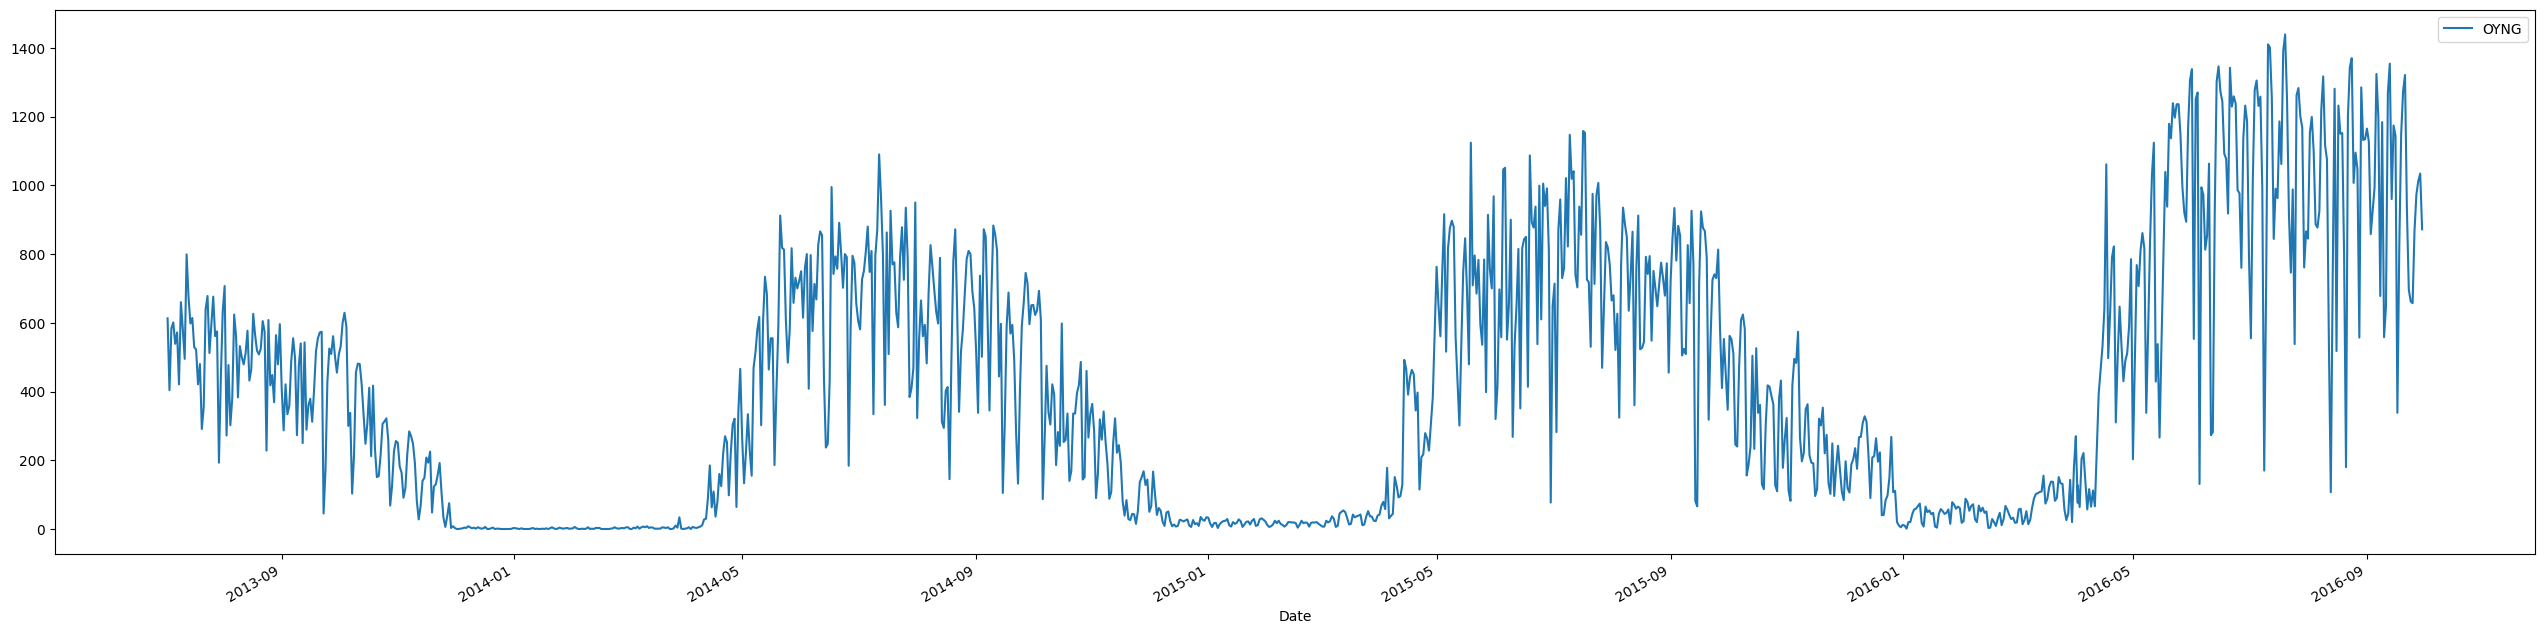

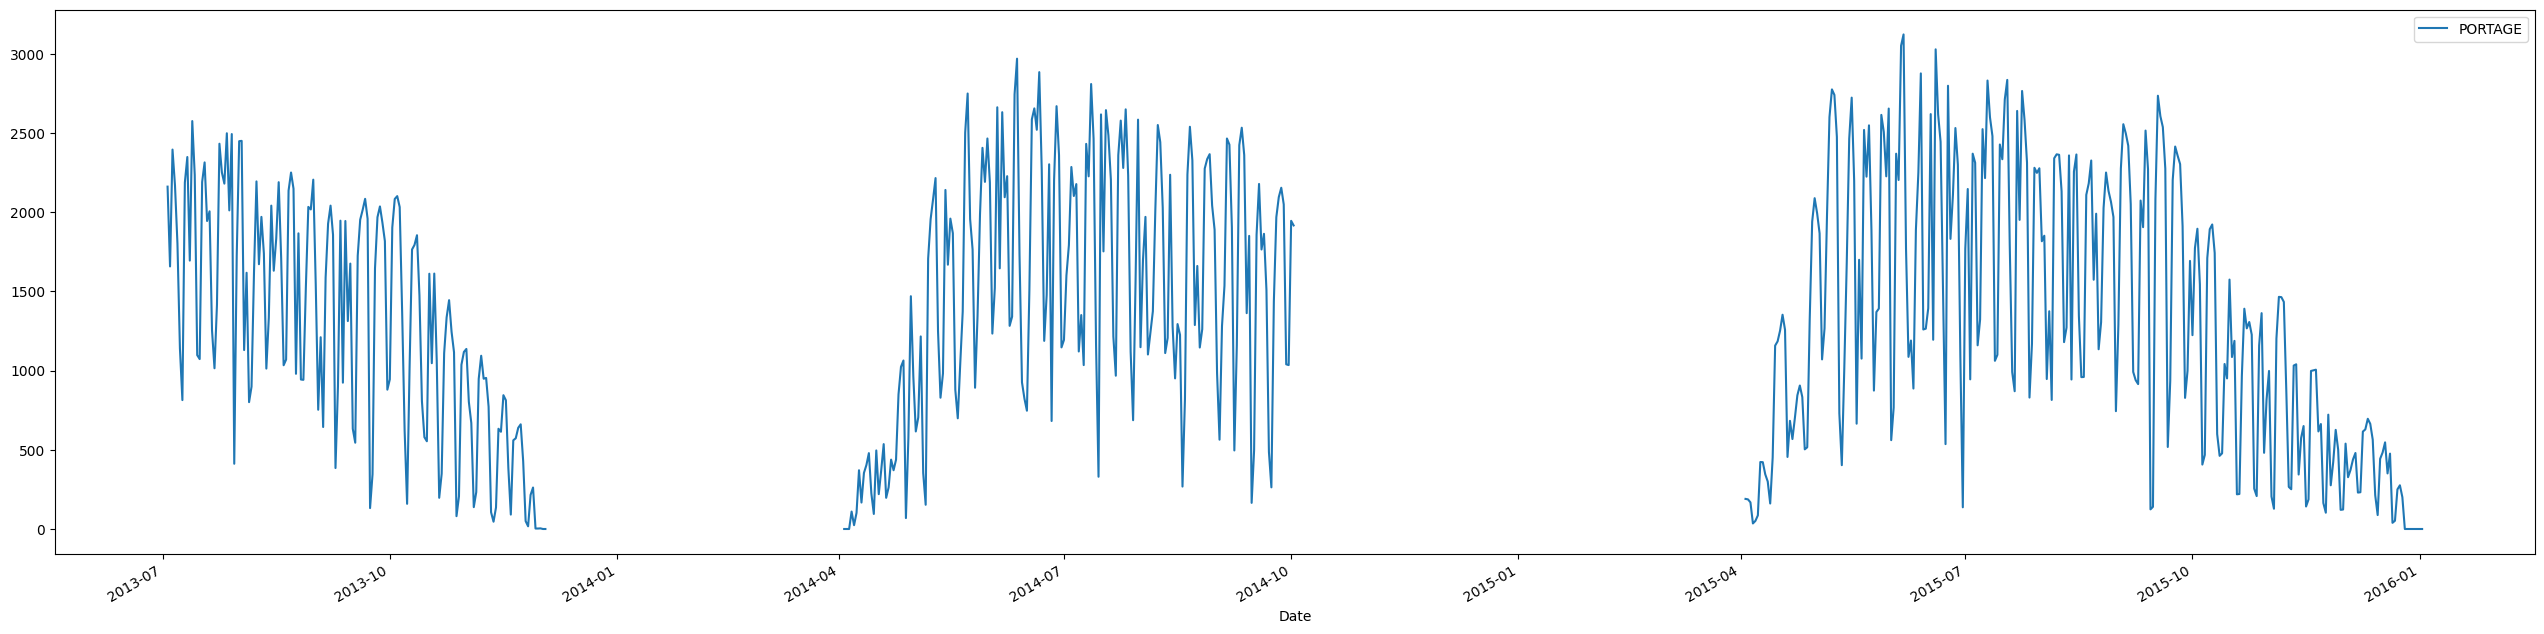

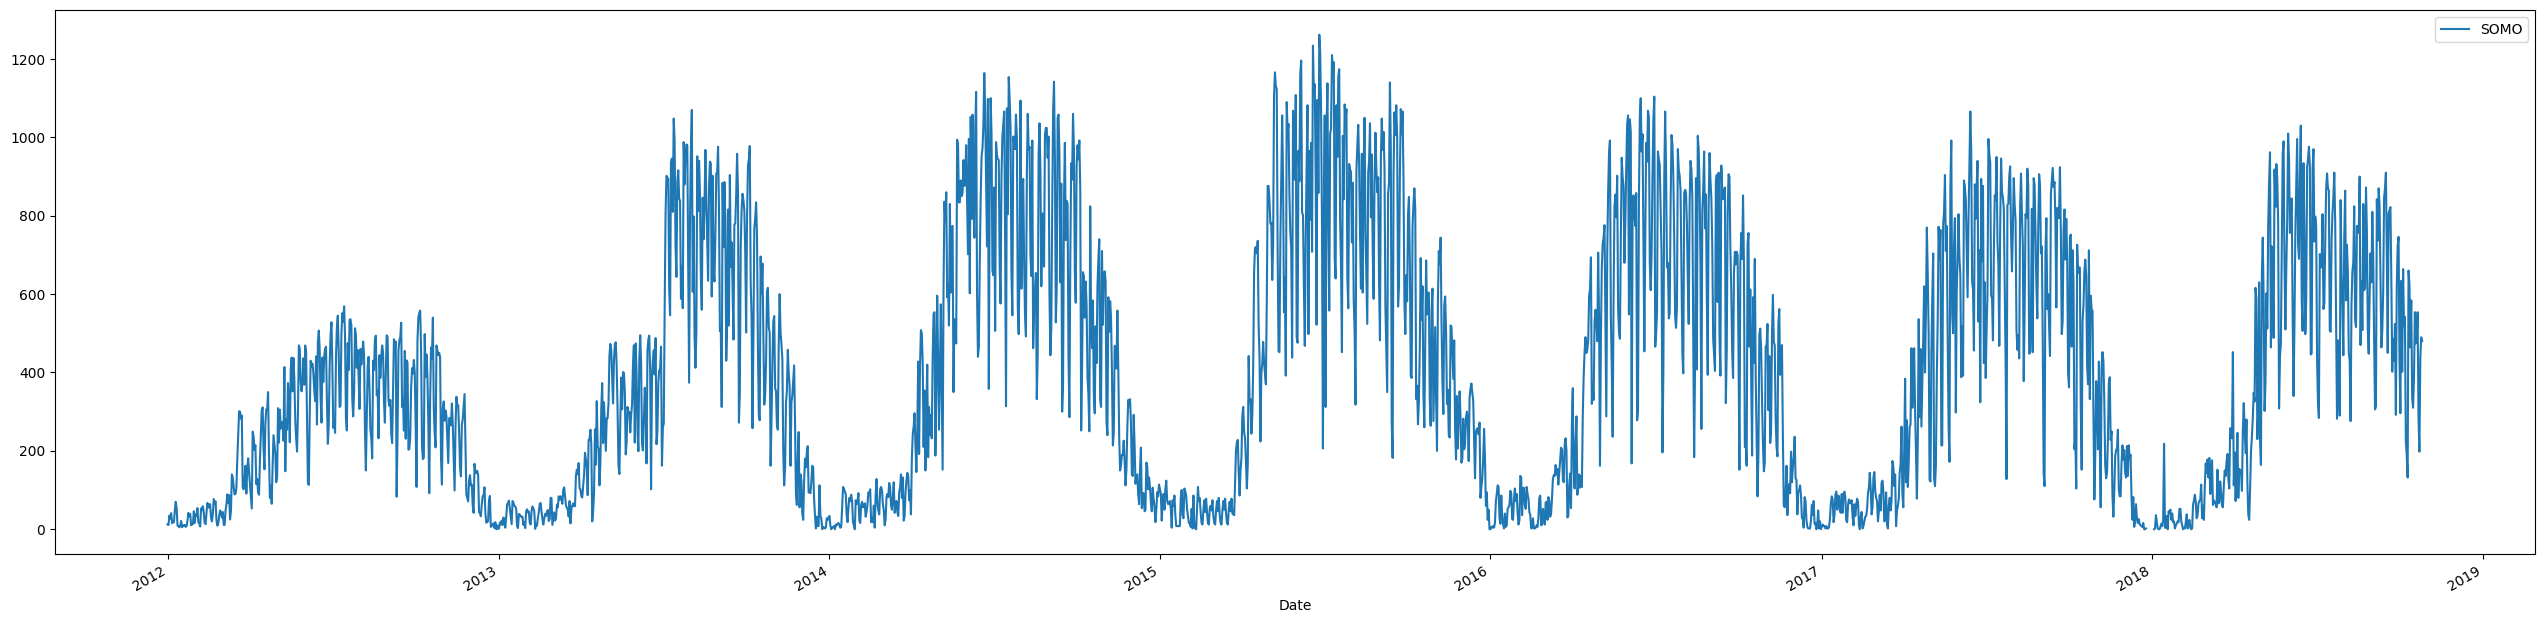

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 


data = pd.read_csv('ottawa_bike_counters.csv')
data.Date = pd.to_datetime(data.Date)
for col in data.columns:
    if col != 'Date':
        data.plot(x='Date',y=col, figsize=(32,8),)

data.describe()

Monday 6734   2823149.0   419.23804573804574
Tuesday 6748   3084778.0   457.1395969176052
Wednesday 6762   3803301.0   562.4520851818988
Thursday 6748   3742916.0   554.6704208654417
Friday 6776   3725039.0   549.7401121605667
Saturday 6762   3387140.0   500.9080153800651
Sunday 6748   3111279.0   461.0668346176645


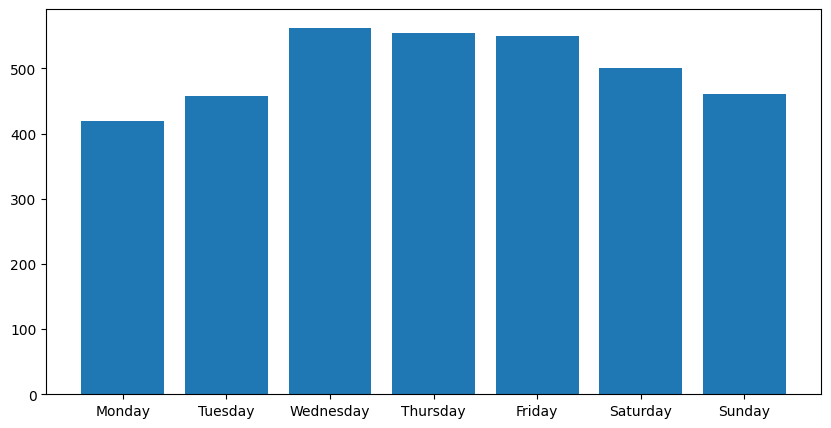

In [5]:
### Weekday Tendancies 
import calendar
import matplotlib.pyplot as plt


sums = [0 for i in range(7)]
counts = [0 for i in range(7)]
data = data.fillna(0)

for row in range(data.shape[0]):
    day_of_week = data.loc[row,'Date'].weekday()
    for col in range(data.shape[1]):
        if col == 0: continue
        sums[day_of_week] += data.loc[row,data.columns[col]]
        counts[day_of_week] += 1
        
averages = [summ/count for summ, count in zip(sums, counts)]


for day_number in range(7):
    print(calendar.day_name[day_number], counts[day_number], ' ', sums[day_number], ' ', averages[day_number])
    
plt.figure(figsize=(10,5))
plt.bar(list(range(7)),averages)
plt.xticks(list(range(7)), [calendar.day_name[day] for day in range(7)])
plt.show()

January 4340   207154.0   47.73133640552995
February 3948   202843.0   51.378672745694026
March 4340   420367.0   96.85875576036867
April 3780   1264292.0   334.46878306878307
May 3906   3208385.0   821.3991295442909
June 3780   3567262.0   943.7201058201058
July 3906   4165274.0   1066.378392217102
August 3906   3731806.0   955.4034818228366
September 3780   3343455.0   884.5119047619048
October 3906   2147295.0   549.7427035330261
November 3780   1085648.0   287.2084656084656
December 3906   333821.0   85.46364567332309


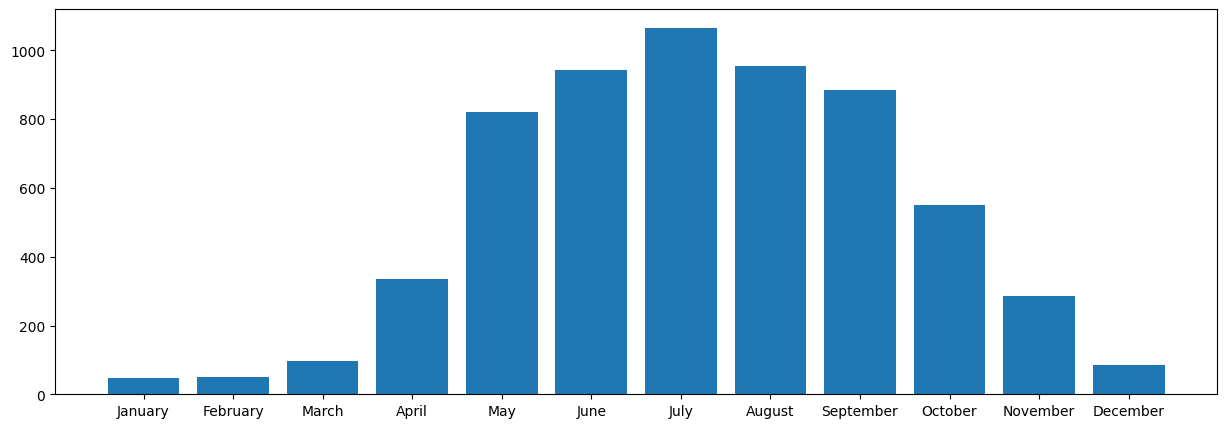

In [6]:
### Monthly Tendancies 
import calendar
import matplotlib.pyplot as plt


sums = [0 for i in range(12)]
counts = [0 for i in range(12)]
data = data.fillna(0)

for row in range(data.shape[0]):
    month_of_year = data.loc[row,'Date'].month - 1
    for col in range(data.shape[1]):
        if col == 0: continue
        sums[month_of_year] += data.loc[row,data.columns[col]]
        counts[month_of_year] += 1
        
averages = [summ/count for summ, count in zip(sums, counts)]

for month_of_year in range(12):
    print(calendar.month_name[month_of_year + 1], counts[month_of_year], ' ', sums[month_of_year], ' ', averages[month_of_year])
    
plt.figure(figsize=(15,5))
plt.bar(list(range(12)),averages)
plt.xticks(list(range(12)), [calendar.month_name[month + 1] for month in range(12)])
plt.show()


In [29]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('ml_friendly_bike_counters.csv')

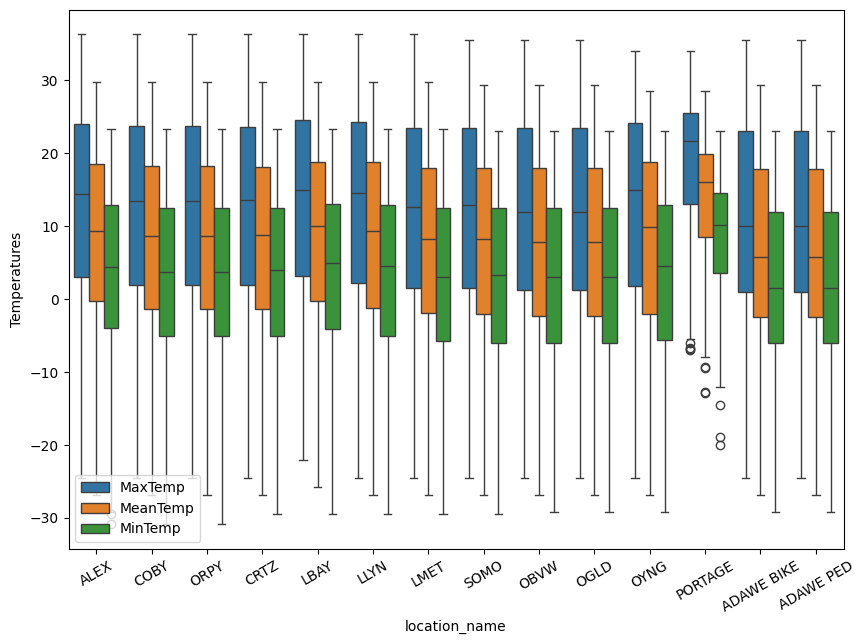

In [34]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(x='location_name', y='Temperatures', hue='variable', 
      data=df[['location_name', 'MaxTemp', 'MeanTemp', 'MinTemp']].melt(id_vars=['location_name'], value_vars=['MaxTemp', 'MeanTemp', 'MinTemp'], value_name='Temperatures'))
plt.xticks(rotation=30)
plt.legend(loc='lower left')
plt.show()

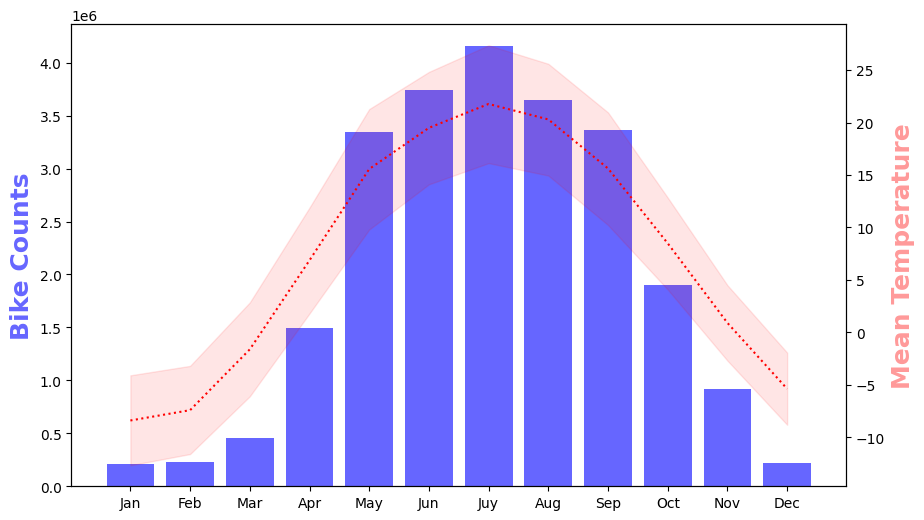

In [35]:
df['Month'] = df['day_of_year']//31
df_month = df.groupby('Month').agg({'count':'sum', 'MaxTemp':'mean', 
                  'MeanTemp':'mean', 'MinTemp':'mean', 
                  'SnowonGrndcm':'mean' ,'TotalPrecipmm':'mean', 
                  'TotalRainmm':'mean', 'TotalSnowcm':'mean'}).reset_index()

fig,ax = plt.subplots(figsize=(10,6))
ax.bar(df_month['Month'], df_month['count'], color='b', alpha=0.6)
ax.set_ylabel("Bike Counts", color='b', fontweight='semibold', fontsize=18, alpha=0.6)
ax2=ax.twinx()
ax2.plot(df_month['MeanTemp'], color='r', ls=':')
ax2.fill_between(df_month['Month'], df_month['MinTemp'], df_month['MaxTemp'], color='r', alpha=0.1)
ax2.set_ylabel("Mean Temperature", color='r', fontweight='semibold', fontsize=18, alpha=0.4)

plt.xticks(np.arange(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Juy', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=30)
plt.show()

In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='2022-01-01')  # Adjust the format accordingly




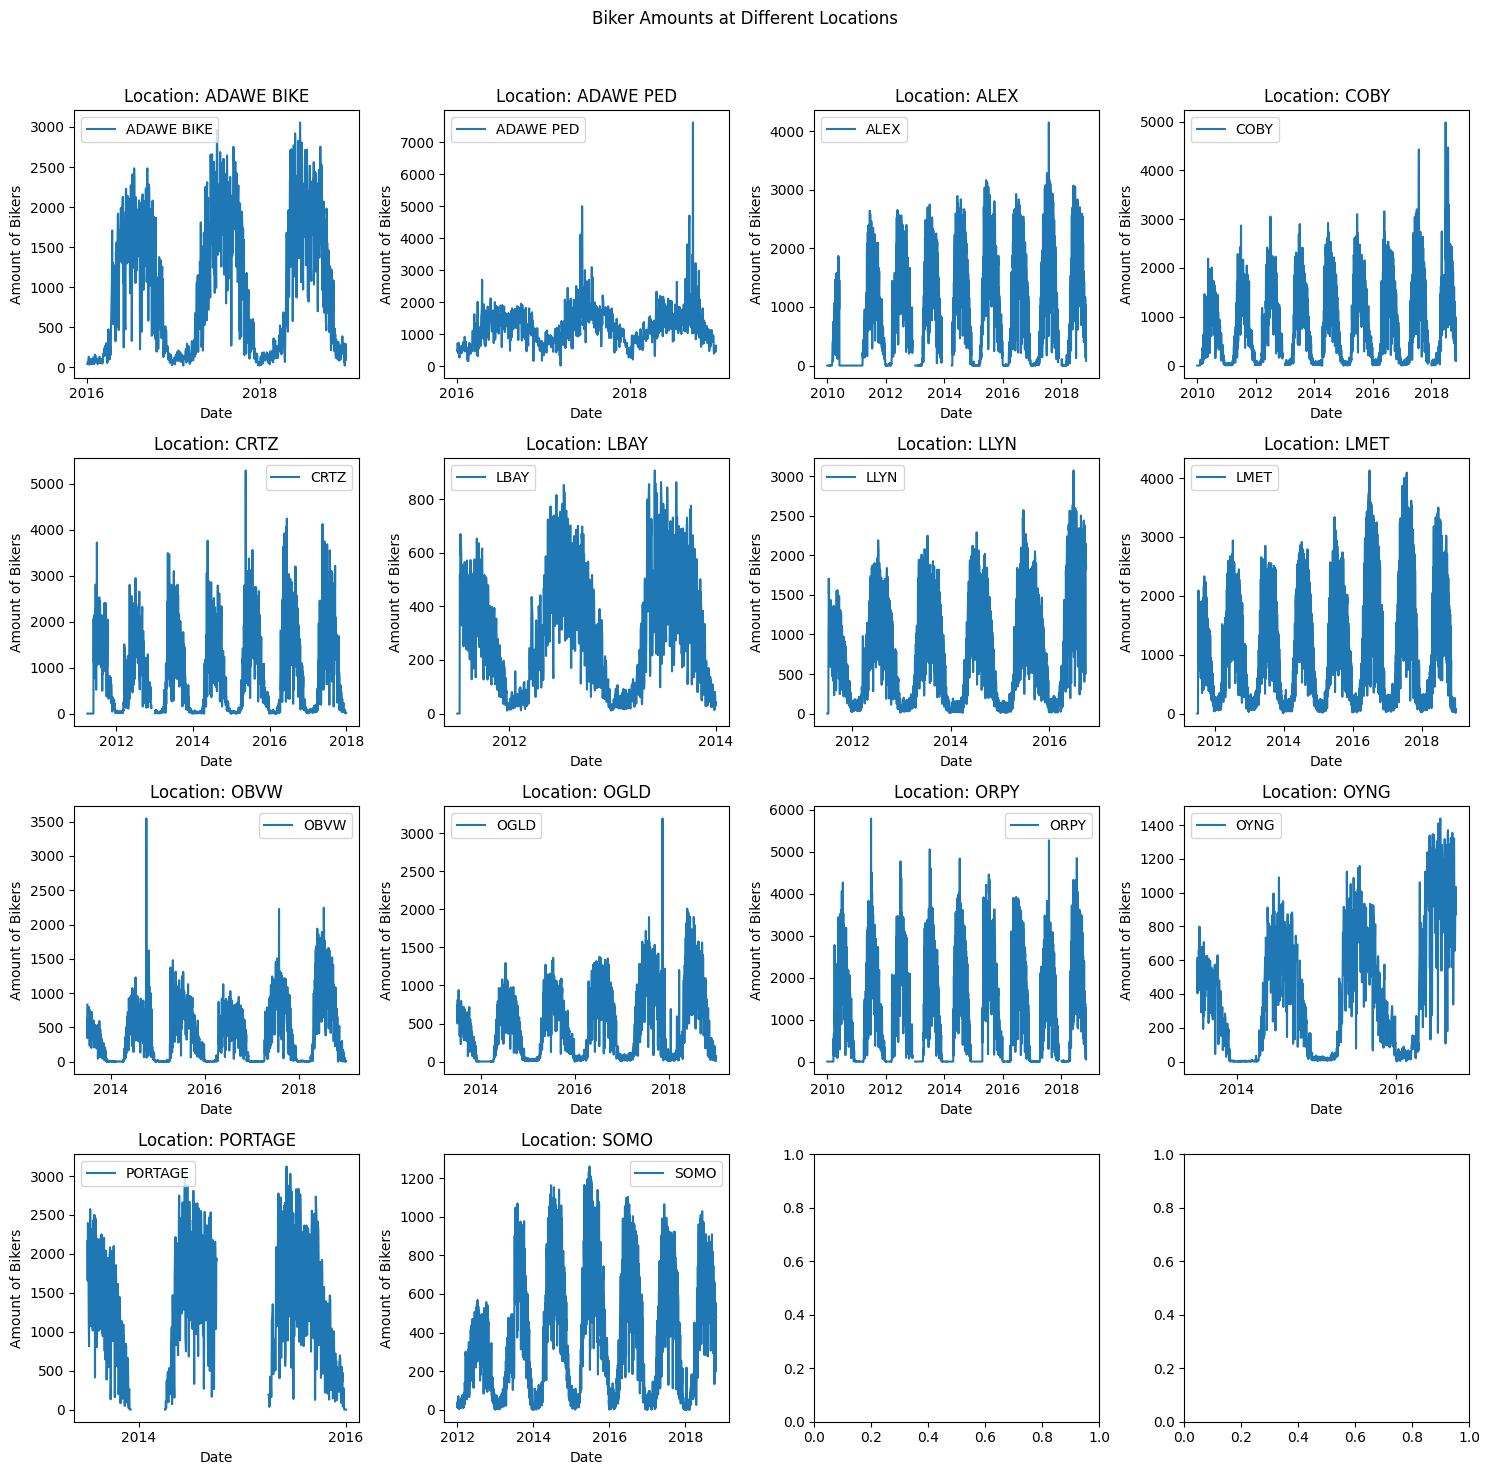

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Read your CSV file into a DataFrame
df = pd.read_csv("ottawa_bike_counters.csv")

# Assuming your DataFrame has a 'timestamp' column, you might need to convert it to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with 14 subplots (one for each location)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Biker Amounts at Different Locations')

# Iterate through each location
locations = ['ADAWE BIKE', 'ADAWE PED', 'ALEX', 'COBY', 'CRTZ', 'LBAY', 'LLYN', 'LMET',
              'OBVW', 'OGLD', 'ORPY', 'OYNG', 'PORTAGE', 'SOMO']
for i, location in enumerate(locations):
    # Plot the data for the current location on the corresponding subplot
    row, col = divmod(i, 4)
    ax = axes[row, col]

    location_data = df[['Date', location]]
    ax.plot(location_data['Date'], location_data[location], label=location)

    ax.set_title(f'Location: {location}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount of Bikers')
    
    # Set ticks every other year
    ax.xaxis.set_major_locator(YearLocator(base=2))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
